In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from datetime import datetime
from matplotlib import rcParams

from matplotlib import rc
rc('font',family='Malgun Gothic')

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

## 1. 데이터 불러오기

In [2]:
movie = pd.read_csv("../data/Preprocessing_movie_data/Data_processing.data.csv")
movie.head()

,moviename,openingdate,sales,attendance,screen,playcount,country,distributor,director,genre,actor,filmrank
0,극한직업,2019.1.23,1.396518e+11,16265618.0,2003.0,292584.0,0,(주)씨제이이엔엠,이병헌,0,3,2
1,명량,2014.7.30,1.357484e+11,17613682.0,1587.0,188611.0,0,(주)씨제이이엔엠,정세교,1,3,1
2,어벤져스: 엔드게임,2019.4.24,1.221827e+11,13934592.0,2835.0,242001.0,1,월트디즈니컴퍼니코리아 유한책임회사,안소니 루소,2,3,1
3,베테랑,2015.8.5,1.051682e+11,13414009.0,1115.0,199231.0,0,(주)씨제이이엔엠,류승완,2,3,2
4,신과함께-인과 연,2018.8.1,1.026661e+11,12274996.0,2235.0,179981.0,0,롯데컬처웍스(주)롯데엔터테인먼트,김용화,3,3,1


## 2. EDA

### 2-1. 개봉일자

In [36]:
### 개봉연도&월별 작품 수
# 개봉연도(openingyear), 개봉월(openingmonth) 칼럼 생성
movie['openingyear'] = movie['openingdate'].dt.year
movie['openingmonth'] = movie['openingdate'].dt.month
movie.head()

,moviename,openingdate,sales,attendance,screen,playcount,country,distributor,director,genre,actor,filmrank,openingyear,openingmonth
0,극한직업,2019-01-23,1.396518e+11,16265618,2003,292584,0,(주)씨제이이엔엠,이병헌,0,3,2,2019,1
1,명량,2014-07-30,1.357484e+11,17613682,1587,188611,0,(주)씨제이이엔엠,정세교,1,3,1,2014,7
2,어벤져스: 엔드게임,2019-04-24,1.221827e+11,13934592,2835,242001,1,월트디즈니컴퍼니코리아 유한책임회사,안소니 루소,2,3,1,2019,4
3,베테랑,2015-08-05,1.051682e+11,13414009,1115,199231,0,(주)씨제이이엔엠,류승완,2,3,2,2015,8
4,신과함께-인과 연,2018-08-01,1.026661e+11,12274996,2235,179981,0,롯데컬처웍스(주)롯데엔터테인먼트,김용화,3,3,1,2018,8


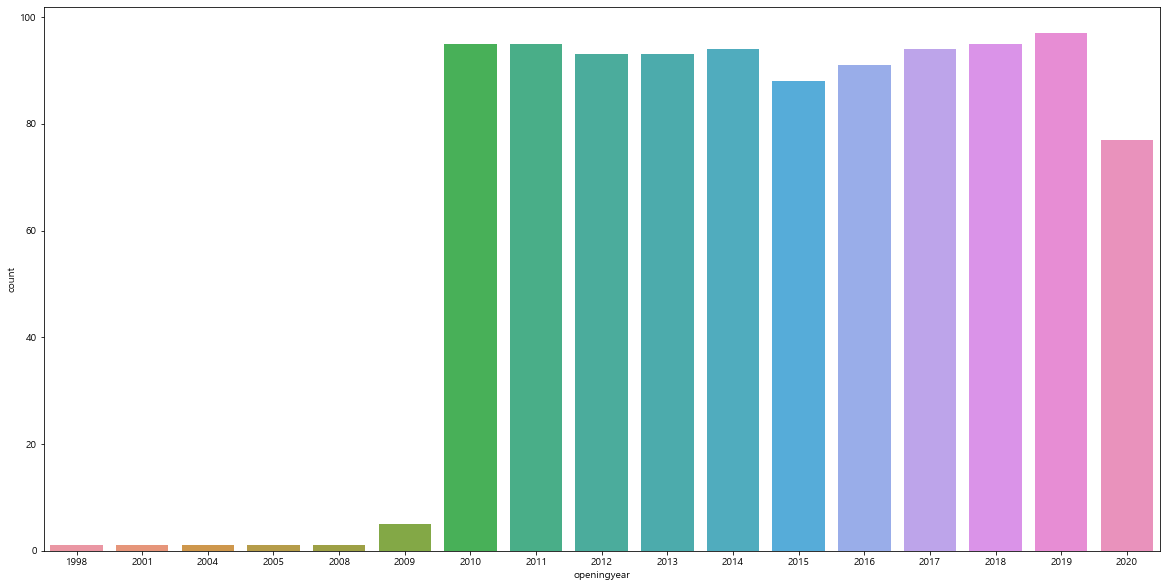

In [44]:
sns.countplot(x=movie['openingyear'])

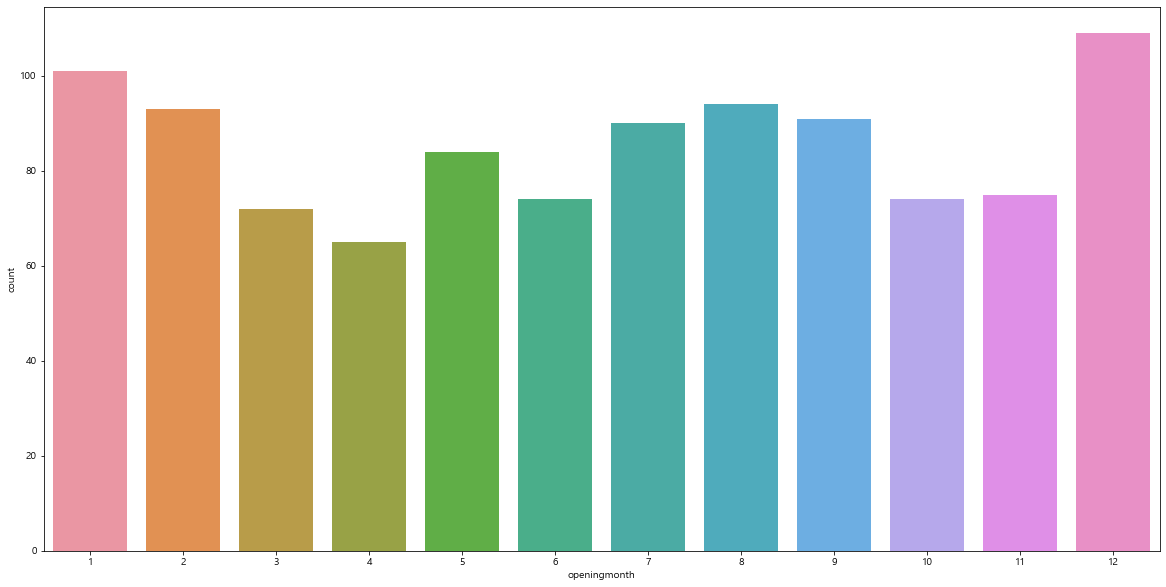

In [45]:
sns.countplot(x=movie['openingmonth'])

In [46]:
# 대체적으로 봄,가을에 비해 겨울,여름에 개봉을 많이 한다.
# 관람객 수도 그에 비례하는지 살펴보자.

In [ ]:
movie

In [50]:
### 월별 개봉작품수와 월별 관람객수의 관계
movie_month = movie.groupby(by='openingmonth')['attendance'].sum()
movie_month

openingmonth
1     187380040
2     125484748
3      84486543
4     125829685
5     131984115
6     128790470
7     227789644
8     200595282
9     141910736
10    119486028
11    100783698
12    139209491
Name: attendance, dtype: int64

### 2-1. 관객 수

In [28]:
# 관객수 많은 영화 Top50
movie_top50 = movie.sort_values(ascending=False, by='attendance').head(50).reset_index(drop=True)
movie_top50

,moviename,openingdate,sales,attendance,screen,playcount,country,distributor,director,genre,actor,filmrank
0,명량,2014-07-30,1.357484e+11,17613682,1587,188611,0,(주)씨제이이엔엠,정세교,1,3,1
1,극한직업,2019-01-23,1.396518e+11,16265618,2003,292584,0,(주)씨제이이엔엠,이병헌,0,3,2
2,어벤져스: 엔드게임,2019-04-24,1.221827e+11,13934592,2835,242001,1,월트디즈니컴퍼니코리아 유한책임회사,안소니 루소,2,3,1
3,베테랑,2015-08-05,1.051682e+11,13414009,1115,199231,0,(주)씨제이이엔엠,류승완,2,3,2
4,도둑들,2012-07-25,9.366481e+10,12983178,1091,155392,1,(주)쇼박스,최동훈,5,3,2
5,7번방의 선물,2013-01-23,9.143191e+10,12811206,866,166815,0,(주)넥스트엔터테인먼트월드(NEW),이환경,0,3,2
6,"광해, 왕이 된 남자",2012-09-13,8.889945e+10,12319390,1001,203400,0,(주)씨제이이엔엠,추창민,4,3,2
7,신과함께-인과 연,2018-08-01,1.026661e+11,12274996,2235,179981,0,롯데컬처웍스(주)롯데엔터테인먼트,김용화,3,3,1
8,택시운전사,2017-08-02,9.585365e+10,12186327,1906,184075,0,(주)쇼박스,장훈,4,3,2
9,부산행,2016-07-20,9.317828e+10,11565479,1788,151315,0,(주)넥스트엔터테인먼트월드(NEW),연상호,2,3,2


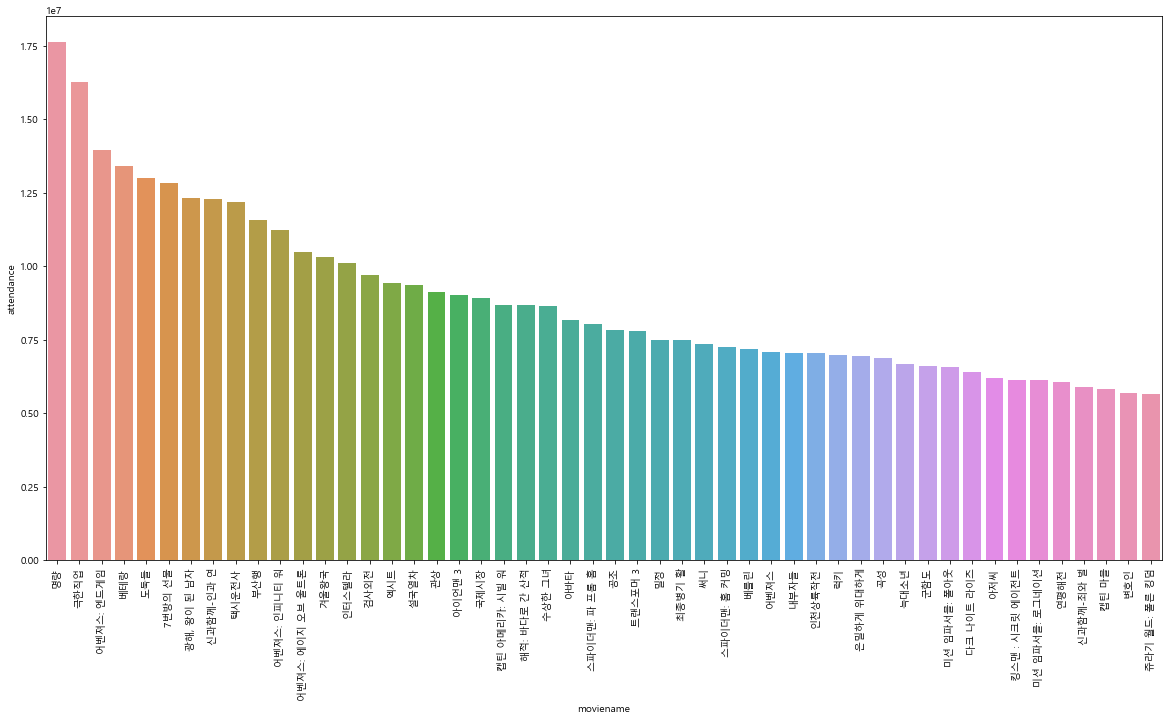

In [25]:
# 관객 수 Top50 그래프
rcParams['figure.figsize'] = 20,10
plt.xticks(rotation= 90)
sns.barplot(x=movie_top50['moviename'], y=movie_top50['attendance'])